### Harvard GSD  J-Term 2121 
### Introduction to Data Science for Building Simulation
***
Instructor: Jung Min Han, jhan2@gsd.harvard.edu <br>
Date/Time: Jan 11-15/ 9:00 - 11:00 a.m. <br>
***

In [7]:
# import library
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
def GetPandasFromFileCSV(path):
    return pd.read_csv(path, delimiter=',')

def GetPandasFromFile(path, theSkipRow):
    return pd.read_csv(path, skiprows= theSkipRow , header=None)

### 1. Load data

In [139]:
df =GetPandasFromFileCSV("HouseZero_full.csv")
df= df[:4000] 
refer =GetPandasFromFileCSV("haravrd_hourly.csv")
refer= refer[:4000] 

<AxesSubplot:>

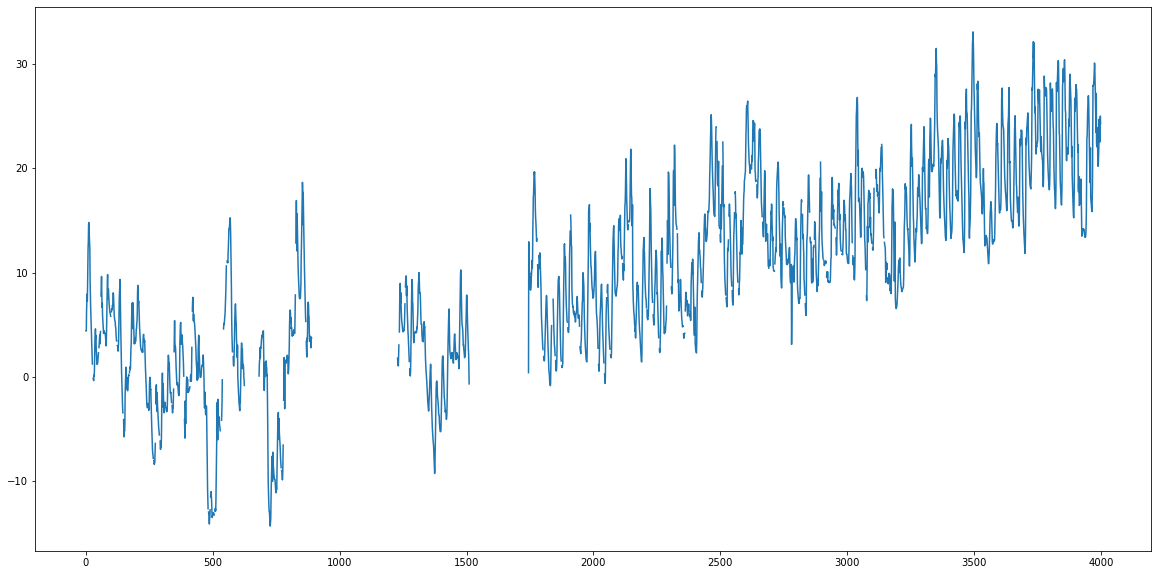

In [140]:
plt.figure(figsize=(20,10))
df["Temp"].plot()

## 2.Imputing missing values

In [149]:
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(refer[["Temp"]])
SimpleImputer()
X = df[["Temp"]]

meanLst = imp.transform(X)
print(imp.transform(X))

np.mean(meanLst)

[[ 4.4000001 ]
 [ 4.4000001 ]
 [ 6.31099996]
 ...
 [24.2203507 ]
 [24.99838743]
 [24.28222226]]


9.597518137601089

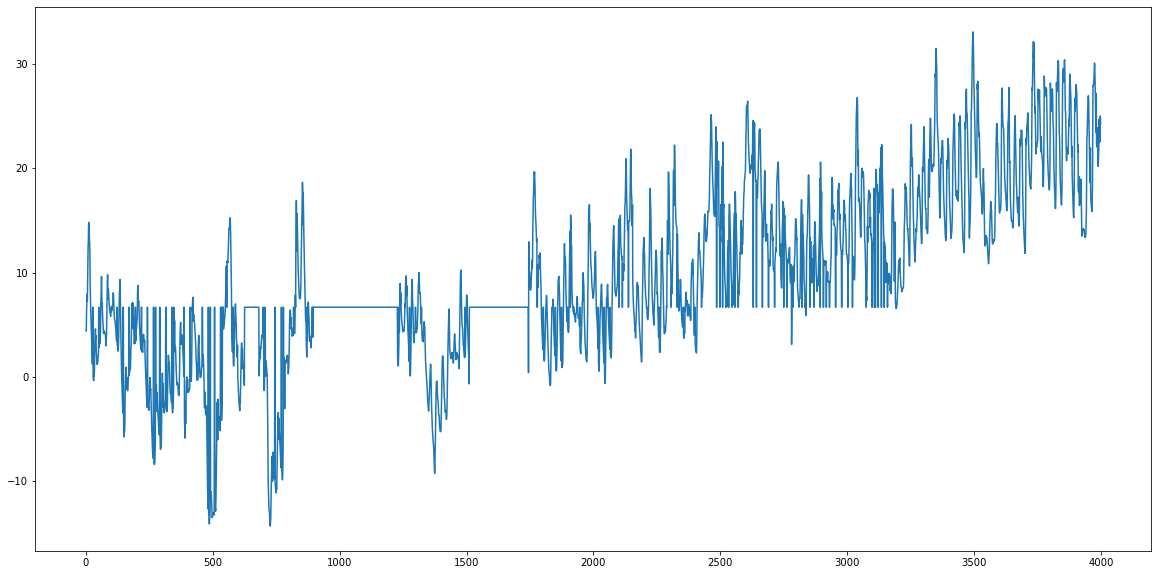

In [150]:
plt.figure(figsize=(20,10))
plt.plot(meanLst.tolist())

In [166]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df[["Temp"]])
SimpleImputer()
X = df[["Temp"]]

meanLst = imp.transform(X)
print(imp.transform(X))

[[ 4.4000001 ]
 [ 4.4000001 ]
 [ 6.31099996]
 ...
 [24.2203507 ]
 [24.99838743]
 [24.28222226]]


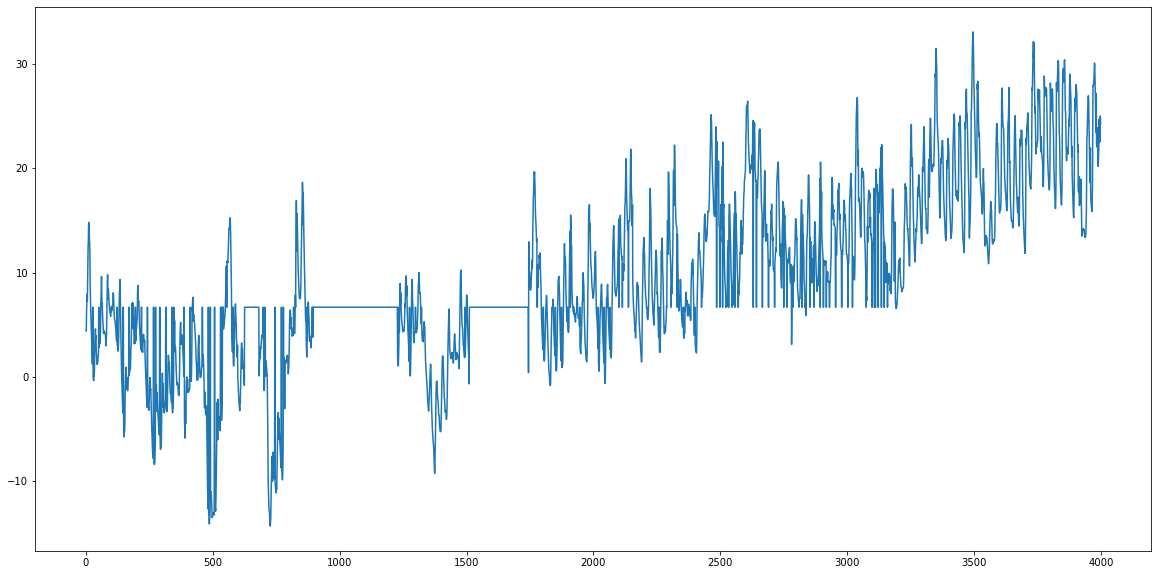

In [167]:
plt.figure(figsize=(20,10))
plt.plot(medianLst.tolist())

##  Visualization

In [195]:
## Read data
f = open("myFile.txt", "r")
print(f.read())

19.5,20,0.5,330.7
19.5,20,1.5,348.8
19.5,20,2.5,355.2
19.5,20,3.5,357.8
19.5,20,4.5,369.3
19.5,20,5.5,370.4
19.5,20,6.5,375.2
19.5,20,7.5,375.7
19.5,20,8.5,381.5
19.5,20,9.5,386.7
19.5,20,10.5,392.8
19.5,20,11.5,397.7
19.5,20,12.5,405.4
19.5,20,13.5,413.2
19.5,20,14.5,421.8
19.5,20,15.5,423.1
19.5,20,16.5,428.1
19.5,20,17.5,434.1
19.5,20,18.5,439.1
19.5,20,19.5,440.2
18.5,20,0.5,302.4
18.5,20,1.5,332.4
18.5,20,2.5,344.9
18.5,20,3.5,351.9
18.5,20,4.5,358.9
18.5,20,5.5,360.4
18.5,20,6.5,364.6
18.5,20,7.5,370.5
18.5,20,8.5,379.6
18.5,20,9.5,384.9
18.5,20,10.5,388.2
18.5,20,11.5,394.4
18.5,20,12.5,406.0
18.5,20,13.5,412.8
18.5,20,14.5,418.9
18.5,20,15.5,424.4
18.5,20,16.5,425.7
18.5,20,17.5,433.3
18.5,20,18.5,438.7
18.5,20,19.5,435.5
17.5,20,0.5,290.8
17.5,20,1.5,321.6
17.5,20,2.5,337.8
17.5,20,3.5,345.6
17.5,20,4.5,350.0
17.5,20,5.5,355.7
17.5,20,6.5,360.1
17.5,20,7.5,367.1
17.5,20,8.5,369.7
17.5,20,9.5,376.4
17.5,20,10.5,385.3
17.5,20,11.5,390.5
17.5,20,12.5,399.7
17.5,20,13.5,405.4
17.5

In [215]:
## Import data to pandas dataframe
dataRad = pd.read_csv('myFile.txt', sep=",", header=None)
dataRad[0]

0       19.5
1       19.5
2       19.5
3       19.5
4       19.5
        ... 
3035     1.5
3036     2.5
3037     3.5
3038     4.5
3039     5.5
Name: 0, Length: 3040, dtype: float64

## Visualize exported data

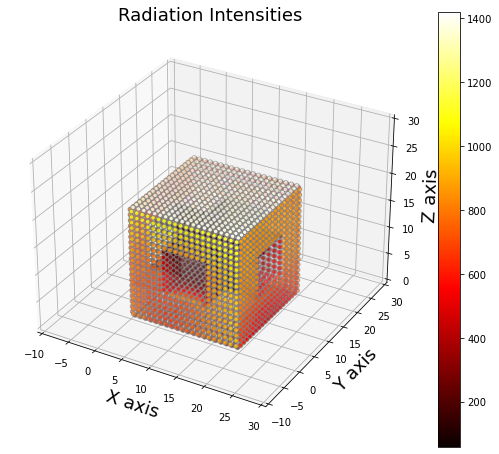

In [216]:
my_cmap = plt.cm.hot

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(122, projection='3d')
im = ax1.scatter(dataRad[0], dataRad[1], dataRad[2], 
                 s=20, c=dataRad[3], cmap=my_cmap, edgecolors='grey')

ax1.set_xlabel('X axis', fontsize =18)
ax1.set_ylabel('Y axis', fontsize =18)
ax1.set_zlabel('Z axis', fontsize =18)
ax1.set_xlim(-10, 30)
ax1.set_ylim(-10, 30)
ax1.set_zlim(0, 30)
ax1.set_title('Radiation Intensities', fontsize =18)
plt.colorbar(im)

plt.show()

In [224]:
## Sampling pandas dataframe
SampledRad = dataRad.sample(n = 1500) 

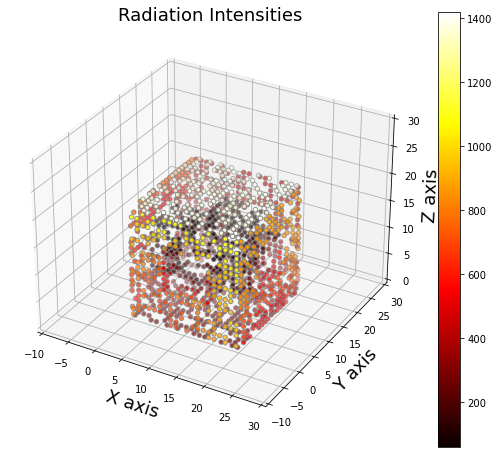

In [225]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(122, projection='3d')
im = ax1.scatter(SampledRad[0], SampledRad[1], SampledRad[2], 
                 s=20, c=SampledRad[3], cmap=my_cmap, edgecolors='grey')

ax1.set_xlabel('X axis', fontsize =18)
ax1.set_ylabel('Y axis', fontsize =18)
ax1.set_zlabel('Z axis', fontsize =18)
ax1.set_xlim(-10, 30)
ax1.set_ylim(-10, 30)
ax1.set_zlim(0, 30)
ax1.set_title('Radiation Intensities', fontsize =18)
plt.colorbar(im)

plt.show()

In [226]:
SampledRad.to_csv('sampledRad.csv',index=False)